# 📊 **Measuring the Impact of an Advertising Campaign on Product Sales Using a Paired T-Test**

**Description:**

This statistical project applies a **Paired T-Test** to evaluate the effectiveness of an advertising campaign by comparing product sales before and after the campaign. We use a synthetic dataset that represents 30 identical stores observed across two time points — before and after running a marketing ad campaign. The goal is to determine whether the observed change in average sales is statistically significant. The project ensures all t-test assumptions (normality, scale, and independence) are checked using statistical tests (Shapiro-Wilk), Q-Q plots, and visualizations. By applying a Paired T-Test, we account for the dependency between the two measurements for the same store, ultimately helping in making evidence-based business decisions.

## **✅ 1. Import Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_rel, probplot
import warnings
warnings.filterwarnings("ignore")


## **✅ 2. Business Scenario & Goal**

**Goal:**
A company launched a marketing ad campaign and wants to determine if it had a significant impact on store-level product sales.

**Scenario:**
We have data on 30 stores' daily average sales **before** and **after** running the ad campaign. Since the same stores are observed in both conditions, a **Paired T-Test** is the appropriate statistical method to assess the effect.

## **✅ 3. Define Hypotheses**

* **Null Hypothesis (H₀):** There is no difference in average sales before and after the campaign.

* **Alternative Hypothesis (H₁):** There is a significant difference in average sales before and after the campaign.

**We will test at α = 0.05.**

## **✅ 4. Generate Synthetic Dataset (Before vs After Ads Campaign)**

In [ ]:
np.random.seed(42)
n = 30

# Generate sales before campaign (mean=200, std=20)
before_sales = np.random.normal(loc=200, scale=20, size=n)

# Generate sales after campaign (slightly higher mean with some noise)
after_sales = before_sales + np.random.normal(loc=10, scale=15, size=n)

# Create DataFrame
sales_df = pd.DataFrame({
    'Store_ID': range(1, n+1),
    'Before_Campaign': before_sales,
    'After_Campaign': after_sales
})

sales_df.head()


,Store_ID,Before_Campaign,After_Campaign
0,1,209.934283,210.908684
1,2,197.234714,235.018887
2,3,212.953771,222.751312
3,4,230.460597,224.594933
4,5,195.316933,217.655106


## **✅ 5. Data Visualization**

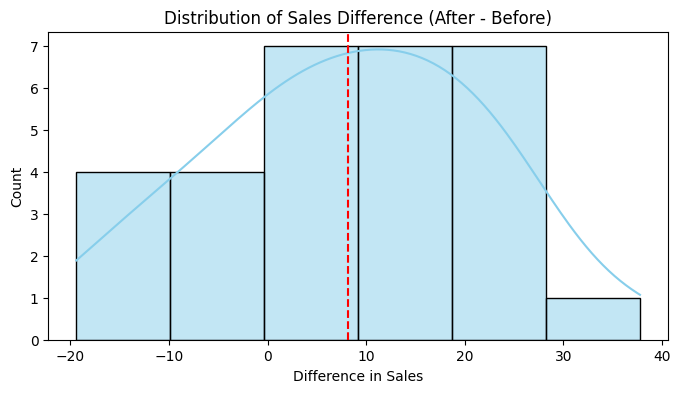

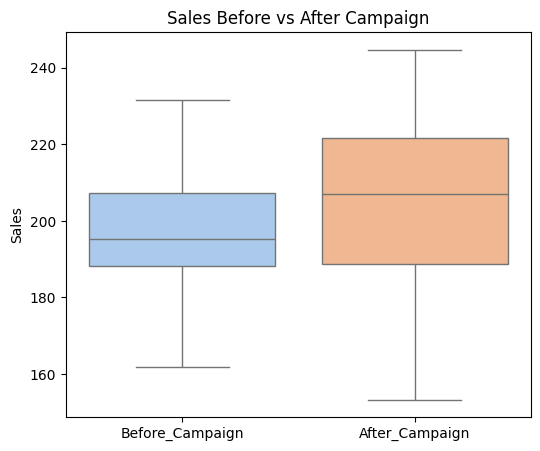

In [ ]:
# Distribution Plot
plt.figure(figsize=(8,4))
sns.histplot(sales_df['Difference'], kde=True, color='skyblue')
plt.axvline(sales_df['Difference'].mean(), color='red', linestyle='--')
plt.title('Distribution of Sales Difference (After - Before)')
plt.xlabel('Difference in Sales')
plt.show()

# Boxplot Comparison
plt.figure(figsize=(6,5))
sns.boxplot(data=sales_df[['Before_Campaign', 'After_Campaign']], palette="pastel")
plt.title("Sales Before vs After Campaign")
plt.ylabel("Sales")
plt.show()


## **✅ 6. Assumption Checks**

**A. Normality of Paired Differences**

Shapiro-Wilk p-value for differences: 0.9130


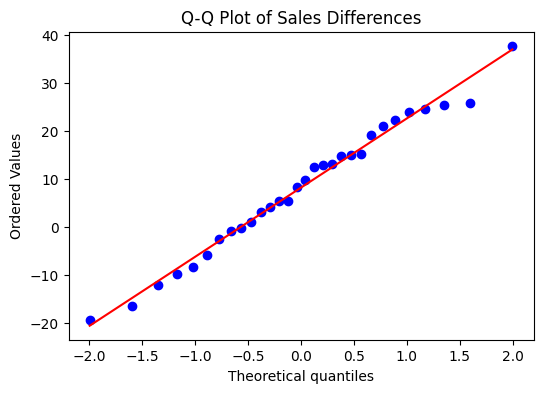

In [ ]:
# Calculate differences
sales_df['Difference'] = sales_df['After_Campaign'] - sales_df['Before_Campaign']

# Shapiro-Wilk Test for Normality
stat, p = shapiro(sales_df['Difference'])
print(f"Shapiro-Wilk p-value for differences: {p:.4f}")

# Q-Q Plot
plt.figure(figsize=(6,4))
probplot(sales_df['Difference'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Sales Differences")
plt.show()


✅ If p > 0.05, we assume normality.

##**✅ 7. Paired T-Test Process**

In [ ]:
# Paired t-test
t_stat, p_value = ttest_rel(sales_df['After_Campaign'], sales_df['Before_Campaign'])
print(f"Paired T-Test: t-stat={t_stat:.4f}, p-value={p_value:.4f}")


Paired T-Test: t-stat=3.2089, p-value=0.0032


## **✅ 8. Interpretation of Results**

In [ ]:
alpha = 0.05
if p_value < alpha:
    result = "✅ Reject the null hypothesis: There IS a significant difference in average sales before and after the campaign."
else:
    result = "❌ Fail to reject the null hypothesis: No significant difference in average sales before and after the campaign."

print(result)


✅ Reject the null hypothesis: There IS a significant difference in average sales before and after the campaign.


**📌 Final Conclusion**

Since the p-value **(0.0032)** < 0.05, we reject the null hypothesis, indicating that the ad campaign had a statistically significant impact on product sales. This supports the business decision to scale or repeat the campaign